In [9]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /Users/Joao/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

[nltk_data] Downloading package stopwords to /Users/Joao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


            Word  Frequency
50          view         66
84          easy         63
22           see         61
24          look         59
40          like         54
72          feel         52
87          good         47
88         place         39
38         image         37
39         clear         35
58          show         32
124      quality         32
59     different         28
113         tour         28
17         visit         28
55          able         28
8    interesting         27
0           nice         27
68          give         25
83         video         24


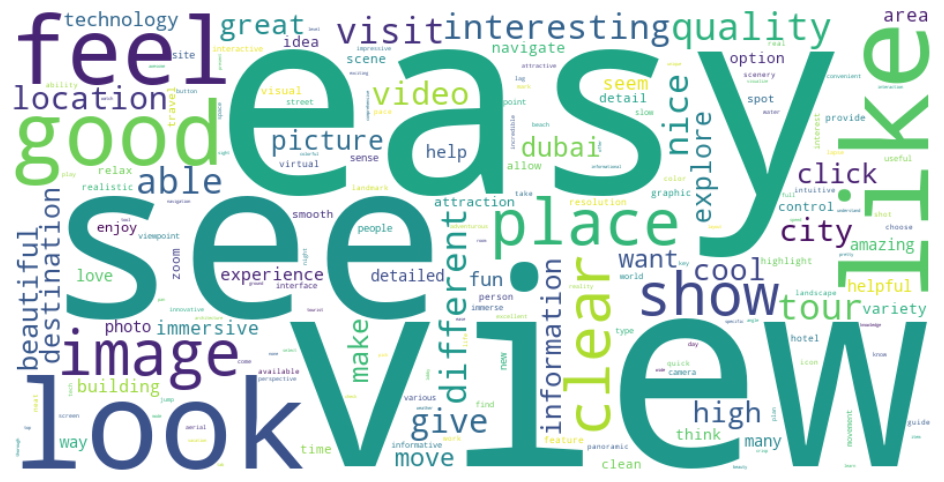

In [1]:
# Import necessary libraries
import pandas as pd
import spacy
import nltk
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download stopwords from NLTK
nltk.download('stopwords')

# Load English stopwords and the SpaCy language model
stop_words = set(stopwords.words('english'))
nlp = spacy.load("en_core_web_sm")

# Load the Excel file and preprocess text data
df = pd.read_excel('raw_data.xlsx')
texts = df['VR quality'].dropna().astype(str).tolist()
raw_text = " ".join(texts)  # Combine all text into one string

# Process text with SpaCy NLP pipeline
doc = nlp(raw_text.lower())

# Define a set of low-value or "nettlesome" words to exclude
nettlesome_words = {
    "thing", "stuff", "say", "use", "get", "really", "well",
    "also", "may", "could", "would", "one", "two", "lot"
}

# Specify parts of speech to keep: nouns, adjectives, and verbs
important_pos = {"NOUN", "ADJ", "VERB"}

# Filter and lemmatize tokens based on multiple criteria
tokens = [
    token.lemma_ for token in doc
    if (
        token.is_alpha and
        token.lemma_ not in stop_words and
        len(token.lemma_) > 2 and
        token.lemma_ not in nettlesome_words and
        token.pos_ in important_pos
    )
]

# Count word frequencies
freq = Counter(tokens)

# Convert word frequency data to a DataFrame and sort
freq_df = pd.DataFrame(freq.items(), columns=['Word', 'Frequency'])
freq_df = freq_df.sort_values(by='Frequency', ascending=False)

# Display the top 20 words
print(freq_df.head(20))

# Save the frequency table to CSV
freq_df.to_csv('vr_quality_word_frequencies.csv', index=False)

# Plot and save the frequency table as an image
fig, ax = plt.subplots(figsize=(8, len(freq_df)*0.25 + 1))
ax.axis('off')
tbl = ax.table(cellText=freq_df.values, colLabels=freq_df.columns, cellLoc='center', loc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.auto_set_column_width(col=list(range(len(freq_df.columns))))
plt.savefig('vr_quality_word_frequencies_table.png', bbox_inches='tight', dpi=300)
plt.close()

# Generate word cloud from word frequencies
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=200
).generate_from_frequencies(freq)

# Save word cloud image
wordcloud.to_file("vr_quality_wordcloud.png")

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
